Chapter 15

# 一阶、二阶导数
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码定义了函数 $f(x) = x^2 - 2$，并计算了该函数的第一和第二阶导数，之后通过图像分别展示了原函数及其导数随 $x$ 的变化趋势。

具体过程如下：

1. **定义函数**：原函数 $f(x) = x^2 - 2$ 是一个简单的二次函数，代码选取 $x$ 的范围为 $[-2, 2]$。通过`lambdify`将符号化函数转化为数值函数，以便对 $x$ 取值进行逐点计算，从而生成 $f(x)$ 的数值数组。

2. **计算导数**：
   - **一阶导数**：代码首先对 $f(x)$ 求导，得到 $f'(x) = 2x$，这表示 $f(x)$ 的斜率或瞬时变化率。通过`lambdify`将一阶导数也转为数值函数，以便后续绘图。
   - **二阶导数**：进一步对 $f(x)$ 的一阶导数求导，得到 $f''(x) = 2$。该常数值表示二次函数 $f(x)$ 的曲率，即在整个定义域内保持凹向上的特性。

3. **绘制图像**：
   - 第一幅图展示了原函数 $f(x)$ 的曲线图，标注了 $x = 0$ 和 $y = 0$ 的对称轴，以便观察函数的整体形状。
   - 第二幅图展示了一阶导数 $f'(x)$ 的曲线图，显示函数斜率随 $x$ 的变化关系。根据 $f'(x) = 2x$，可以看出 $f(x)$ 的增长速率在 $x > 0$ 时为正，在 $x < 0$ 时为负。
   - 第三幅图展示了二阶导数 $f''(x)$ 的曲线图。由于 $f''(x)$ 恒为常数 $2$，其图像为一条平行于 $x$ 轴的水平线，表明 $f(x)$ 的凹性不变。

通过这些图像，代码直观展示了函数 $f(x)$ 及其导数的变化，帮助理解函数的曲率和单调性等性质。

## 导入包

In [1]:
from sympy import latex, lambdify, diff, sin  # 导入SymPy中的latex格式化、数值化、求导函数
from sympy.abc import x  # 导入符号变量x
import numpy as np
from matplotlib import pyplot as plt  # 导入NumPy和Matplotlib用于数值计算和绘图

## 定义原函数 f(x)

In [2]:
f_x = x**2 - 2  # 定义函数表达式 f(x) = x^2 - 2
f_x

x**2 - 2

In [3]:
x_array = np.linspace(-2, 2, 100)  # 定义x的范围，从-2到2，生成100个点
f_x_fcn = lambdify(x, f_x)  # 将符号函数f(x)转换为数值函数
f_x_array = f_x_fcn(x_array)  # 计算每个x对应的f(x)值

## 计算一阶导数

In [4]:
f_x_1_diff = diff(f_x, x)  # 对f(x)进行一阶求导，得到f'(x) = 2x
f_x_1_diff  # 打印一阶导数的表达式

2*x

In [5]:
f_x_1_diff_fcn = lambdify(x, f_x_1_diff)  # 将一阶导数转换为数值函数
f_x_1_diff_array = f_x_1_diff_fcn(x_array)  # 计算每个x对应的一阶导数值

## 计算二阶导数

In [6]:
f_x_2_diff = diff(f_x, x, 2)  # 对f(x)进行二阶求导，得到f''(x) = 2
f_x_2_diff  # 打印二阶导数的表达式

2

In [7]:
f_x_2_diff_fcn = lambdify(x, f_x_2_diff)  # 将二阶导数转换为数值函数
f_x_2_diff_array = f_x_2_diff_fcn(x_array)  # 计算每个x对应的二阶导数值
f_x_2_diff_array = f_x_2_diff_array + x_array * 0  # 确保数组形状与x_array一致

## 绘制原函数及其一阶和二阶导数

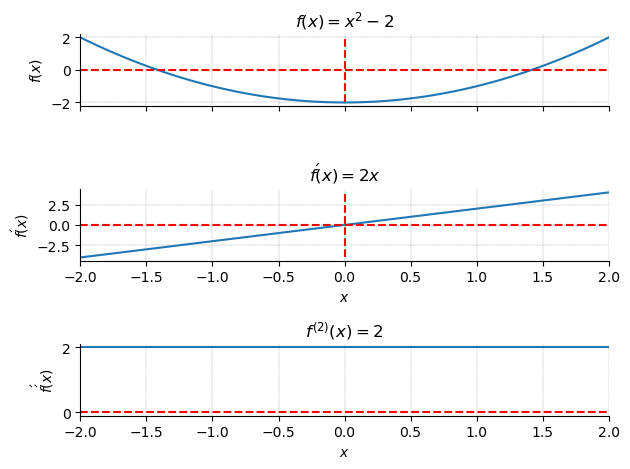

In [10]:
fig, ax = plt.subplots(3, 1)  # 创建绘图窗口，包含三个子图用于绘制f(x)、f'(x)和f''(x)

# 绘制原函数 f(x)
ax[0].plot(x_array, f_x_array, linewidth=1.5)  # 绘制f(x)曲线
ax[0].hlines(y=0, xmin=x_array.min(), xmax=x_array.max(), color='r', linestyle='--')  # 水平线y=0，表示x轴
ax[0].vlines(x=0, ymin=f_x_array.min(), ymax=f_x_array.max(), color='r', linestyle='--')  # 垂直线x=0
ax[0].set_title('$f(x) = %s$' % latex(f_x))  # 标题显示函数表达式
ax[0].set_ylabel('$f(x)$')  # 设置y轴标签
ax[0].set_xlim((x_array.min(), x_array.max()))  # 设置x轴范围
ax[0].spines['right'].set_visible(False)  # 隐藏右边框
ax[0].spines['top'].set_visible(False)  # 隐藏上边框
ax[0].set_xticklabels([])  # 隐藏x轴刻度标签
ax[0].grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])  # 设置网格线

# 绘制一阶导数 f'(x)
ax[1].plot(x_array, f_x_1_diff_array, linewidth=1.5)  # 绘制f'(x)曲线
ax[1].hlines(y=0, xmin=x_array.min(), xmax=x_array.max(), color='r', linestyle='--')  # 水平线y=0
ax[1].vlines(x=0, ymin=f_x_1_diff_array.min(), ymax=f_x_1_diff_array.max(), color='r', linestyle='--')  # 垂直线x=0
ax[1].set_xlabel(r"$\it{x}$")  # 设置x轴标签
ax[1].set_title(r'$f\'(x) = %s$' % latex(f_x_1_diff))  # 标题显示一阶导数表达式
ax[1].set_ylabel(r'$f\'(x)$')  # 设置y轴标签
ax[1].grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])  # 设置网格线
ax[1].set_xlim((x_array.min(), x_array.max()))  # 设置x轴范围
ax[1].spines['right'].set_visible(False)  # 隐藏右边框
ax[1].spines['top'].set_visible(False)  # 隐藏上边框

# 绘制二阶导数 f''(x)
ax[2].plot(x_array, f_x_2_diff_array, linewidth=1.5)  # 绘制f''(x)曲线
ax[2].hlines(y=0, xmin=x_array.min(), xmax=x_array.max(), color='r', linestyle='--')  # 水平线y=0
ax[2].vlines(x=0, ymin=f_x_2_diff_array.min(), ymax=f_x_2_diff_array.max(), color='r', linestyle='--')  # 垂直线x=0
ax[2].set_xlabel(r"$\it{x}$")  # 设置x轴标签
ax[2].set_title(r'$f^{(2)}(x) = %s$' % latex(f_x_2_diff))  # 标题显示二阶导数表达式
ax[2].set_ylabel(r'$f\'\'(x)$')  # 设置y轴标签
ax[2].grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])  # 设置网格线
ax[2].set_xlim((x_array.min(), x_array.max()))  # 设置x轴范围
ax[2].spines['right'].set_visible(False)  # 隐藏右边框
ax[2].spines['top'].set_visible(False)  # 隐藏上边框

plt.tight_layout()